## Prequirements

In [1]:
!pip install requests
!pip install datasets
!pip install pillow
from datasets import load_dataset
from PIL import Image
import requests
from IPython.display import display
import os
import json
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.4 MB/s eta 0:00:00


## Get genre, style and artist text

In [2]:
url = "https://huggingface.co/datasets/huggan/wikiart/raw/main/dataset_infos.json"
response = requests.get(url)
data = response.json()
genre_names = data["huggan--wikiart"]["features"]["genre"]["names"]
style_names = data["huggan--wikiart"]["features"]["style"]["names"]
origin_style_amount = data["huggan--wikiart"]["features"]["style"]["num_classes"]
artists = data["huggan--wikiart"]["features"]["artist"]["names"]

## Download images from wikiart dataset

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/81444 [00:00<?, ? examples/s]

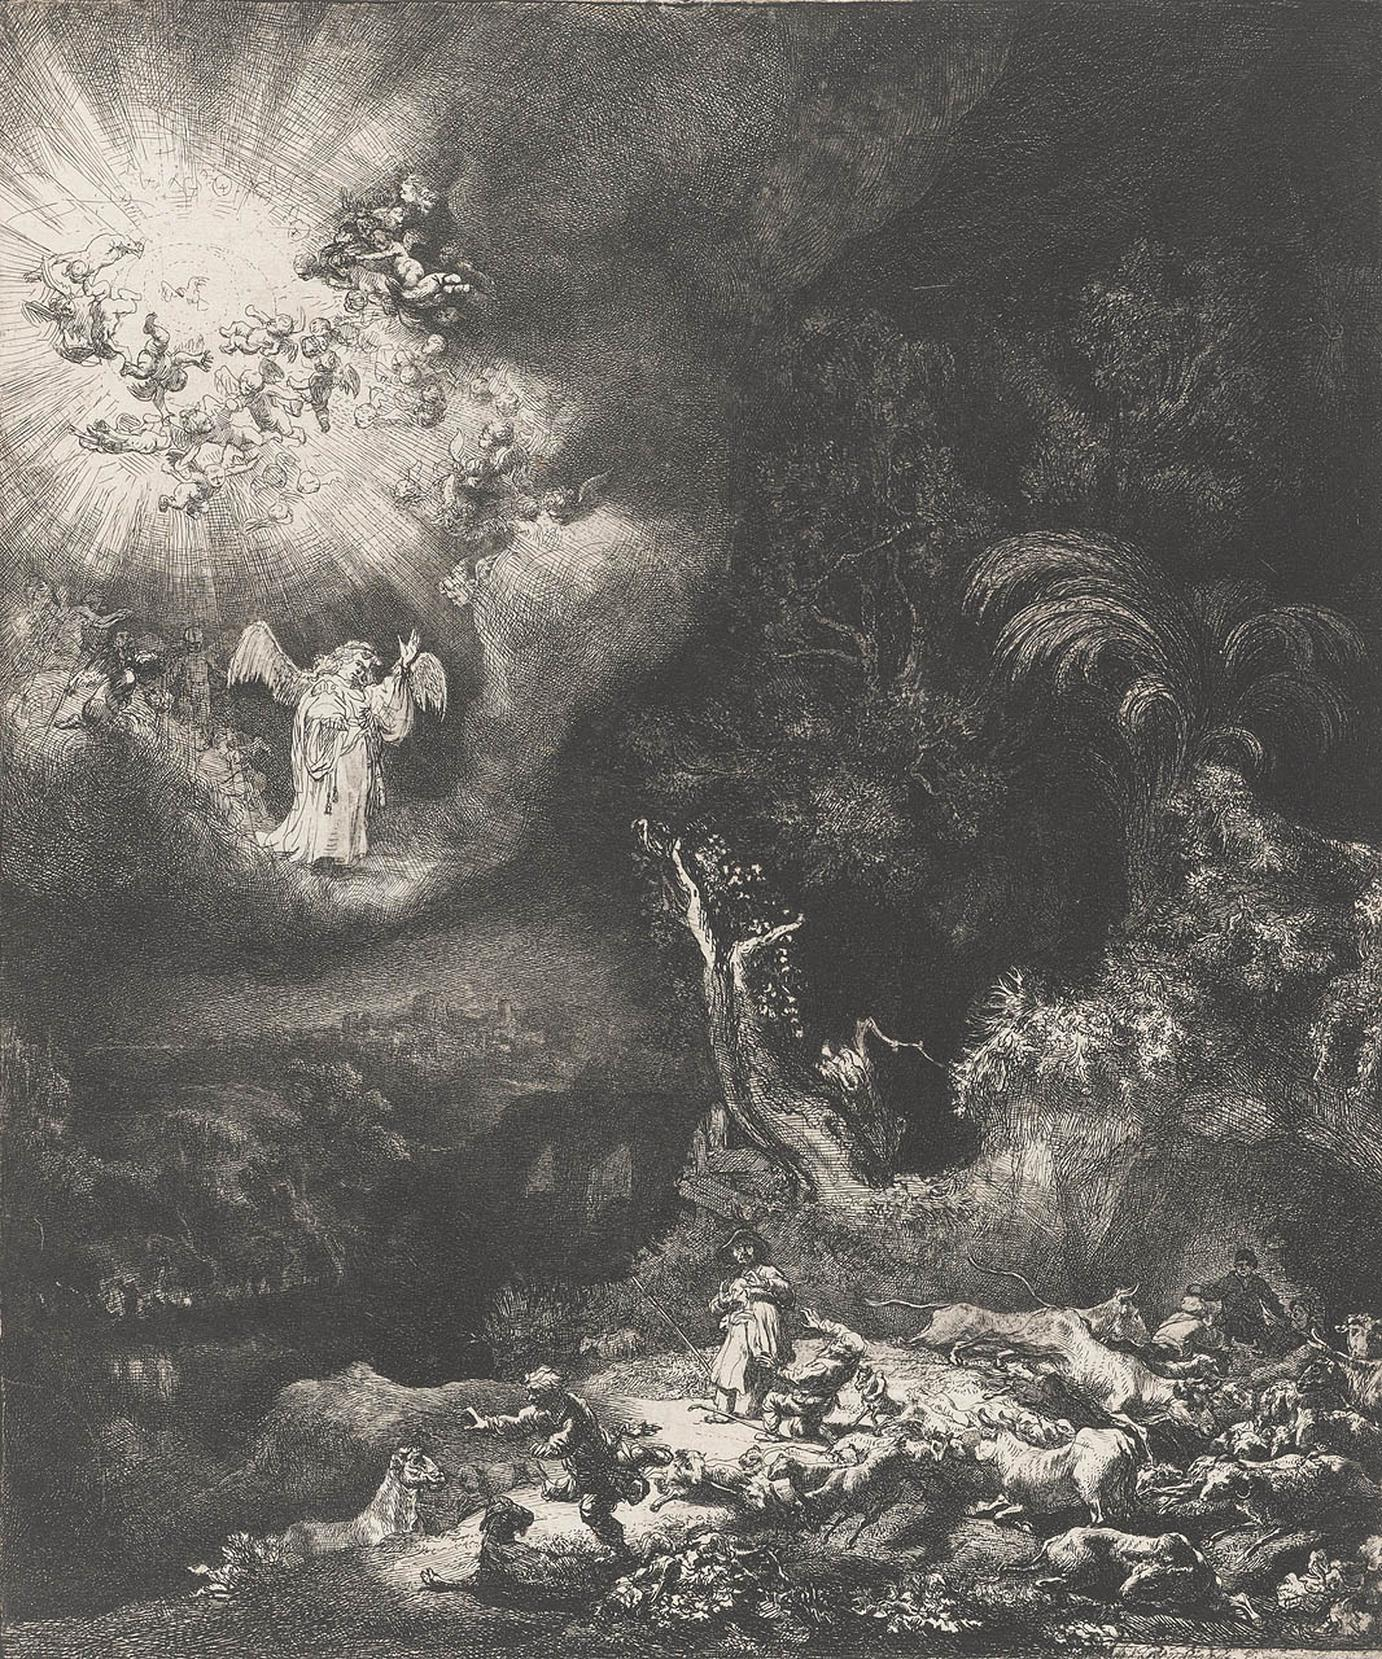

In [3]:
ds = load_dataset("huggan/wikiart")
train_ds = ds["train"]
train_ds[1]["image"]

## select images according to the  required style number

In [10]:
index = 0
image_per_style = 100
image_dict = {}
image_list = []
index = 0
print(f'Please enter the style index that you want: ', end="")
target_style = int(input())
for image_detail in train_ds:
  # check if is target style
  style_number = image_detail['style']
  if style_number == target_style:
    #print(f'{index}: {style_number}, {target_style}')
    image_list.append(index)

  index = index + 1
  if index%10000==0:
    print(index)

Please enter the style index that you want: 26
10000
20000
30000
40000
50000
60000
70000
80000


## check if every image is the required style

In [12]:
for index in image_list:
  if train_ds[index]["style"]!=target_style:
    print(train_ds[index]["style"])

## save images

In [13]:
select_images = random.sample(image_list, image_per_style)
index = 0
for image_index in select_images:
  image_detail = train_ds[image_index]

  # style
  style_number = image_detail['style']
  style_text = style_names[style_number]

  # artist
  artist_number = image_detail['artist']
  artist_name = artists[artist_number]

  # genre
  genre_number = image_detail['genre']
  genre_text = genre_names[genre_number]

  # image
  image = image_detail["image"]
  # image.thumbnail((max_width, max_height))
  # display(image)
  os.makedirs(style_text, exist_ok=True)
  image_name = f'{style_text}_{index}.png'
  image.save(f'{style_text}/{image_name}')

  # record image detail in JSON
  image_dict[image_name] = {"style": style_text, "genre": genre_text, "artist": artist_name}

  index = index + 1

## compress to a zip file

In [14]:
!zip -r "Ukiyo_e.zip" "Ukiyo_e"

  adding: Ukiyo_e/ (stored 0%)
  adding: Ukiyo_e/Ukiyo_e_27.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_19.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_93.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_52.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_8.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_95.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_81.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_96.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_47.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_91.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_30.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_14.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_45.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_78.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_66.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_10.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_41.png (deflated 1%)
  adding: Ukiyo_e/Ukiyo_e_20.png (deflated 1%)
  adding: Ukiyo_e/Ukiyo_e_24.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_25.png (deflated 0%)
  adding: Ukiyo_e/Ukiyo_e_12.p

In [15]:
image_dict

{'Ukiyo_e_0.png': {'style': 'Ukiyo_e',
  'genre': 'Unknown Genre',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_1.png': {'style': 'Ukiyo_e',
  'genre': 'Unknown Genre',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_2.png': {'style': 'Ukiyo_e',
  'genre': 'genre_painting',
  'artist': 'katsushika-hokusai'},
 'Ukiyo_e_3.png': {'style': 'Ukiyo_e',
  'genre': 'portrait',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_4.png': {'style': 'Ukiyo_e',
  'genre': 'Unknown Genre',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_5.png': {'style': 'Ukiyo_e',
  'genre': 'Unknown Genre',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_6.png': {'style': 'Ukiyo_e',
  'genre': 'genre_painting',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_7.png': {'style': 'Ukiyo_e',
  'genre': 'portrait',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_8.png': {'style': 'Ukiyo_e',
  'genre': 'portrait',
  'artist': 'utagawa-kuniyoshi'},
 'Ukiyo_e_9.png': {'style': 'Ukiyo_e',
  'genre': 'genre_painting',
  'artist': 'Unknown Artist'},
 'Ukiyo_e_10.png': {'styl

## save style list to a javascript file

In [18]:
# Specify the path to the JSON file
json_file_path = os.path.join("style_list.js")

# Write the dictionary to the JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(style_names, json_file, indent=4)

with open(json_file_path, 'r') as file:
    existing_content = file.read()

with open(json_file_path, 'w') as file:
    new_string = "style_names="
    file.write(new_string)
    file.write(existing_content)